In [811]:
import wfdb
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import math
from scipy.signal import butter, lfilter
from scipy.fftpack import fft, ifft
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import itertools
from pylab import plot, show, title, xlabel, ylabel, subplot
from scipy import fft, arange
from scipy import signal
import seaborn as sns
from numpy.random import permutation
from sklearn.svm import SVC  
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier  

In [2]:
fileName=['a01','a02','a03','a04','a05','a06','a07','a08','a09','a10','a11','a12','a13','a14','a15','a16','a17','a18','a19','a20',
         'b01','b02','b03','b04','b05','c01','c02','c03','c04','c05','c06','c07','c08','c09','c10',
         'x01','x02','x03','x04','x05','x06','x07','x08','x09','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20']
mypath='C:/Users/sara/Documents/5anno/TESI/DataBase_PhysioNet/www.physionet.org/physiobank/database/apnea-ecg/'

In [3]:
def calcolaPSD(lista):
    lista=lista.tolist()
    for i in range (0,65536-len(lista)):
        lista.append(.0)
   # print(len(lista))
    dft= fft(lista)
    freq = np.fft.fftfreq(len(lista))
   
    PSD = np.abs(dft) ** 2
   # PSD=scipy.signal.periodogram(FFT)
    #magnitude=PSD[0]
   # print(len(PSD),'h')
    PSD64=[]
    for i in range (0,64):
        PSD64.append(statistics.mean(PSD[1024*i:1024*(i+1)]))

    return PSD64

In [4]:
def serial_corr(y1, lag):
    y2=np.roll(y1,lag)
   # m=statistics.mean(y1)
    #num=0
    #denom=0
    return np.corrcoef(y1,y2)[0,1]
    #for i in range(0,len(y1)):
     #   num+=(y1[i]-m)*(y2[i]-m)
      #  denom+=(y1[i]-m)**2
    #return num/denom

In [7]:
def AT(rr,rr_time,k):
    count=[]
    while(j<rr_time[len(rr_time)-1]):
        while(i<len(rr_time) and rr_time[i]>=j*5 and rr_time[i]<=(j+1)*5):
            c+=1
            i+=1
        j+=1
        count.append(c)
        
    

In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [9]:
def calcola_nn50v1(lista):
    lista=np.array(lista)
    #print(lista)
    count=0
    for i in range (0,len(lista)-2):
        if(lista[i+1]-lista[i]-50>0):
            count+=1
    return count

In [10]:
def calcola_NEP(lista):
    sommatoria=0
    if(len(lista)<=2):
        return(np.nan)
    for i in range(1,len(lista)-1):
        var=(lista[i]-lista[i-1])*(lista[i+1]-lista[i])
        sommatoria+=(1-np.heaviside(var,0.5))
    return sommatoria/(len(lista)-2)

In [11]:
index=22
dfRR = pd.read_pickle(mypath+'RR-EDR/'+fileName[index]+'RR.pkl')
dfEDR = pd.read_pickle(mypath+'RR-EDR/'+fileName[index]+'EDR.pkl')
dfDivisione = pd.read_pickle( mypath+'DivisioneDB/'+fileName[index]+'divisione.pkl')
RR_intervals=dfRR['rr']

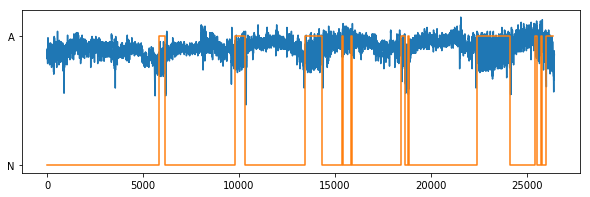

In [12]:
plt.figure(figsize=(10,3))

plt.plot(dfRR['time'],dfRR['rr'])
#plt.plot(dfEDR['time'],dfEDR['edr'])
plt.step(dfDivisione['time_apn'],dfDivisione['label'])

<Figure size 720x216 with 0 Axes>

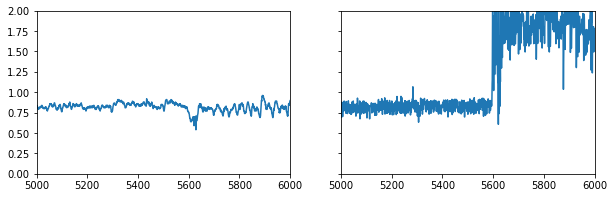

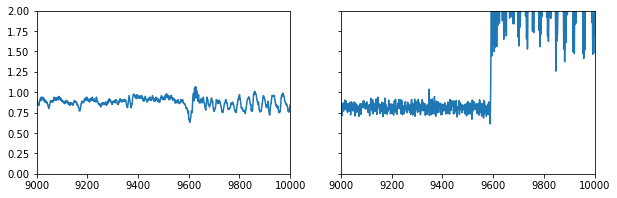

In [13]:
plt.figure(figsize=(10,3))
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row',figsize=(10, 3))
for i in range (0,2):
    ax[i].axis([5000,6000,0,2])
ax[0].plot(dfRR['time'],dfRR['rr'])
ax[1].plot(dfEDR['time'],dfEDR['edr'])
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row',figsize=(10, 3))
for i in range (0,2):
    ax[i].axis([9000,10000,0,2])
ax[0].plot(dfRR['time'],dfRR['rr'])
ax[1].plot(dfEDR['time'],dfEDR['edr'])

In [14]:
interbeat_diff=[]
for i in range (0,len(RR_intervals)-1):
    interbeat_diff.append(RR_intervals[i+1]-RR_intervals[i])

In [15]:
serial_corr(RR_intervals[:-1],1)

0.9611314174742325

In [16]:
y1=RR_intervals[:-1]
y2=y2=np.roll(y1,1)
np.corrcoef(y1,y2)[0,1]

0.9611314174742325

## Time domain Features

In [27]:
df_features_list=[]
db=[]
db_index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]
for index in db_index:
    #index=0
    print(index)
    dfFeatures=pd.DataFrame()
    mediaRR=[]
    stdRR=[]
    mediaEDR=[]
    stdEDR=[]
    stdDIFF=[]
    rms=[]
    NN50v1=[]
    NN50v2=[]
    label=[]
    #db=[]
    sc1=[]
    sc2=[]
    sc3=[]
    sc4=[]
    sc5=[]
    iqr=[]
    RMSDD=[]
    NEP=[]
    #---------------------------LETTURA SEGNALI------------------------------
    dfRR = pd.read_pickle(mypath+'RR-EDR/'+fileName[index]+'RR.pkl')
    dfEDR = pd.read_pickle(mypath+'RR-EDR/'+fileName[index]+'EDR.pkl')
    dfDivisione = pd.read_pickle( mypath+'DivisioneDB/'+fileName[index]+'divisione.pkl')
    RR_intervals=dfRR['rr']
    interbeat_diff=[]
    for i in range (0,len(RR_intervals)-1):
        interbeat_diff.append(RR_intervals[i+1]-RR_intervals[i])
    EDR=dfEDR['edr']
    interbeat_diff_2=[i**2 for i in interbeat_diff]

    #----------------------------------ESTRAZIONE FEATURES-----------------------
    for i in range (0,len(dfDivisione)):
        durata=dfDivisione['stopEDRIndex'][i]-dfDivisione['startEDRIndex'][i]
        startRR=dfDivisione['startRRIndex'][i]
        stopRR=dfDivisione['stopRRIndex'][i]
        intervallo=RR_intervals[startRR:stopRR]
        if(durata<2):
            mediaRR.append(np.nan)
            mediaEDR.append(np.nan)
            stdRR.append(np.nan)
            stdEDR.append(np.nan)
            stdDIFF.append(np.nan)
            sc1.append(np.nan)
            sc2.append(np.nan)
            sc3.append(np.nan)
            sc4.append(np.nan)
            sc5.append(np.nan)
            iqr.append(np.nan)
            RMSDD.append(np.nan)  
            NEP.append(np.nan)
        else:
            mediaRR.append(statistics.mean(RR_intervals[startRR:stopRR]))
            mediaEDR.append(statistics.mean(EDR[dfDivisione['startEDRIndex'][i]:dfDivisione['stopEDRIndex'][i]]))
            stdRR.append(statistics.stdev(RR_intervals[startRR:stopRR]))
            stdEDR.append(statistics.stdev(EDR[dfDivisione['startEDRIndex'][i]:dfDivisione['stopEDRIndex'][i]]))
            stdDIFF.append(statistics.stdev(interbeat_diff[startRR:stopRR]))
            RMSDD.append(math.sqrt(statistics.mean(interbeat_diff_2[startRR:stopRR])))
            sc1.append(np.corrcoef(intervallo,np.roll(intervallo,1))[0,1])
            sc2.append(np.corrcoef(intervallo,np.roll(intervallo,2))[0,1])
            sc3.append(np.corrcoef(intervallo,np.roll(intervallo,3))[0,1])
            sc4.append(np.corrcoef(intervallo,np.roll(intervallo,4))[0,1])
            sc5.append(np.corrcoef(intervallo,np.roll(intervallo,5))[0,1])
            q75, q25 = np.percentile(intervallo, [75 ,25])
            NEP.append(calcola_NEP(np.array(intervallo)))
            iqr.append(q75 - q25)
            db.append(index)
        
        
        rms.append(np.sqrt(np.mean(RR_intervals[startRR:stopRR]**2)))
        NN50v1.append(calcola_nn50v1(RR_intervals[startRR:stopRR]))            
        #print('a')
        

        if (dfDivisione['label'][i]=='N'):
            label.append(0)
        else:
            label.append(1)
        
    #dfFeatures['db']=db
    dfFeatures['mediaRR']=mediaRR
    dfFeatures['mediaEDR']=mediaEDR
    dfFeatures['stdRR']=stdRR
    dfFeatures['stdEDR']=stdEDR
    dfFeatures['stdDIFF']=stdDIFF
    dfFeatures['rms']=rms
    dfFeatures['sc1']=sc1
    dfFeatures['sc2']=sc2
    dfFeatures['sc3']=sc3
    dfFeatures['sc4']=sc4
    dfFeatures['sc5']=sc5
    dfFeatures['iqr']=iqr
    dfFeatures['RMSDD']=RMSDD
    dfFeatures['NEP']=NEP
    #dfFeatures['NN50v1']=NN50v1
    dfFeatures['label']=label
    
    dfFeatures=dfFeatures.dropna()
    df_features_list.append(dfFeatures)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


In [361]:
df_tot=pd.DataFrame()
for i in range(0,len(df_features_list)):
    df_tot=df_tot.append(df_features_list[i],ignore_index=True)

In [362]:
df_tot.columns

Index(['mediaRR', 'mediaEDR', 'stdRR', 'stdEDR', 'stdDIFF', 'rms', 'sc1',
       'sc2', 'sc3', 'sc4', 'sc5', 'iqr', 'RMSDD', 'NEP', 'label'],
      dtype='object')

In [363]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
df_tot=df_tot.dropna()
scaled_values = scaler.fit_transform(df_tot) 
df_tot.loc[:,:] = scaled_values

In [366]:
df_tot['db']=db
df_tot.to_pickle(mypath+'Features/TimeFeatures.pkl')

## FEATURE SELECTION

In [723]:
df_tot = pd.read_pickle(mypath+'Features/TimeFeatures.pkl')

In [444]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression
X = df_tot.iloc[:,0:14]
X = (X - X.mean()) / (X.std())  
y = np.array(df_tot.iloc[:,14])
#X['label']=y
Selector_f = SelectPercentile(f_regression, percentile=25)
Selector_f.fit(X, y)
features=X.columns
for i in range(0,len(Selector_f.scores_)):
     print ('F-score: ',Selector_f.scores_[i], ' for feature ',features[i])

F-score:  7.467209007556573  for feature  mediaRR
F-score:  15.732685118390675  for feature  mediaEDR
F-score:  10.900214854840048  for feature  stdRR
F-score:  11.751971947255612  for feature  stdEDR
F-score:  105.05358909794832  for feature  stdDIFF
F-score:  7.842909654893787  for feature  rms
F-score:  2645.8332546851375  for feature  sc1
F-score:  4593.775363910395  for feature  sc2
F-score:  4884.147561247377  for feature  sc3
F-score:  2932.576133819509  for feature  sc4
F-score:  1788.4071845839767  for feature  sc5
F-score:  79.20759233231001  for feature  iqr
F-score:  107.49427622222544  for feature  RMSDD
F-score:  15.952950554799427  for feature  NEP


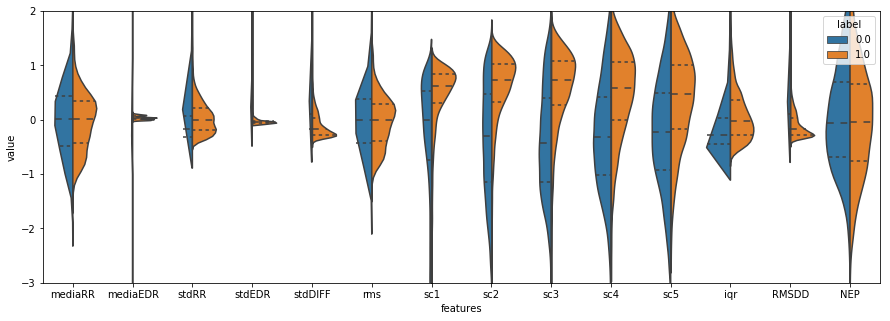

In [445]:
plt.figure(figsize=(15,5))
X['label']=y
data = pd.melt(X,id_vars="label",
                    var_name="features",
                    value_name='value')
plt.axis([9,10000,-3,2])
sns.violinplot(x="features", y="value", hue="label", data=data,split=True, inner="quart")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

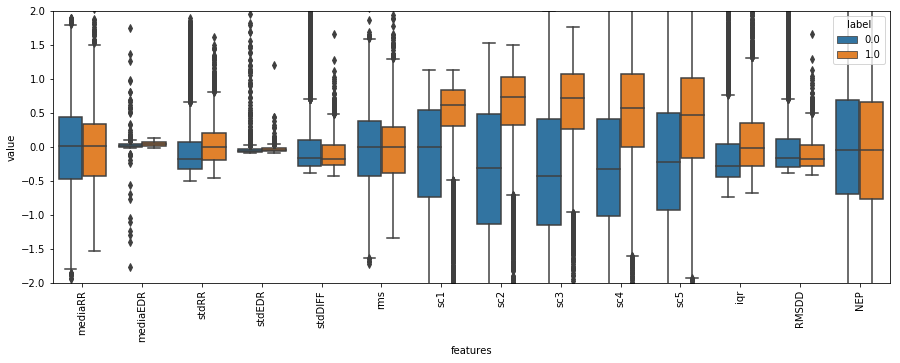

In [446]:
plt.figure(figsize=(15,5))
plt.axis([9,10000,-2,2])
sns.boxplot(x="features", y="value", hue="label", data=data)
plt.xticks(rotation=90)

C:\Users\sara\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\sara\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


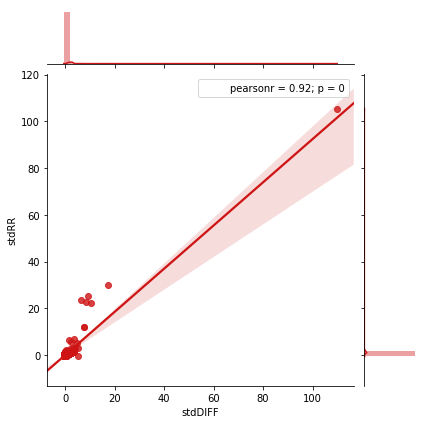

In [447]:
sns.jointplot(X['stdDIFF'], X['stdRR'], kind="regg", color="#ce1414")

C:\Users\sara\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\sara\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\sara\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


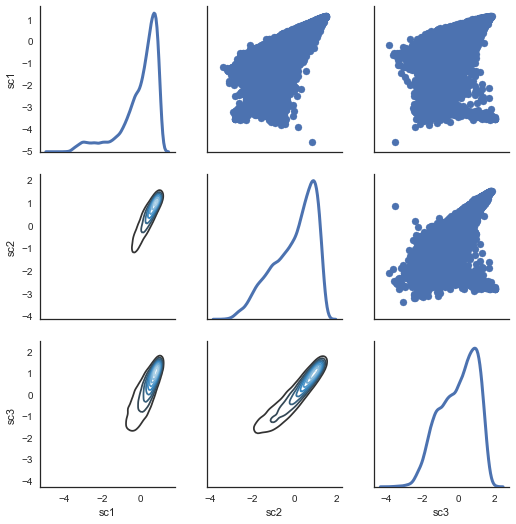

In [185]:
sns.set(style="white")
df = X.loc[:,['sc1','sc2','sc3']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

In [ ]:
plt.figure(figsize=(15,7))
plt.axis([9,10000,-5,8])
sns.swarmplot(x="features", y="value", hue="label", data=data)

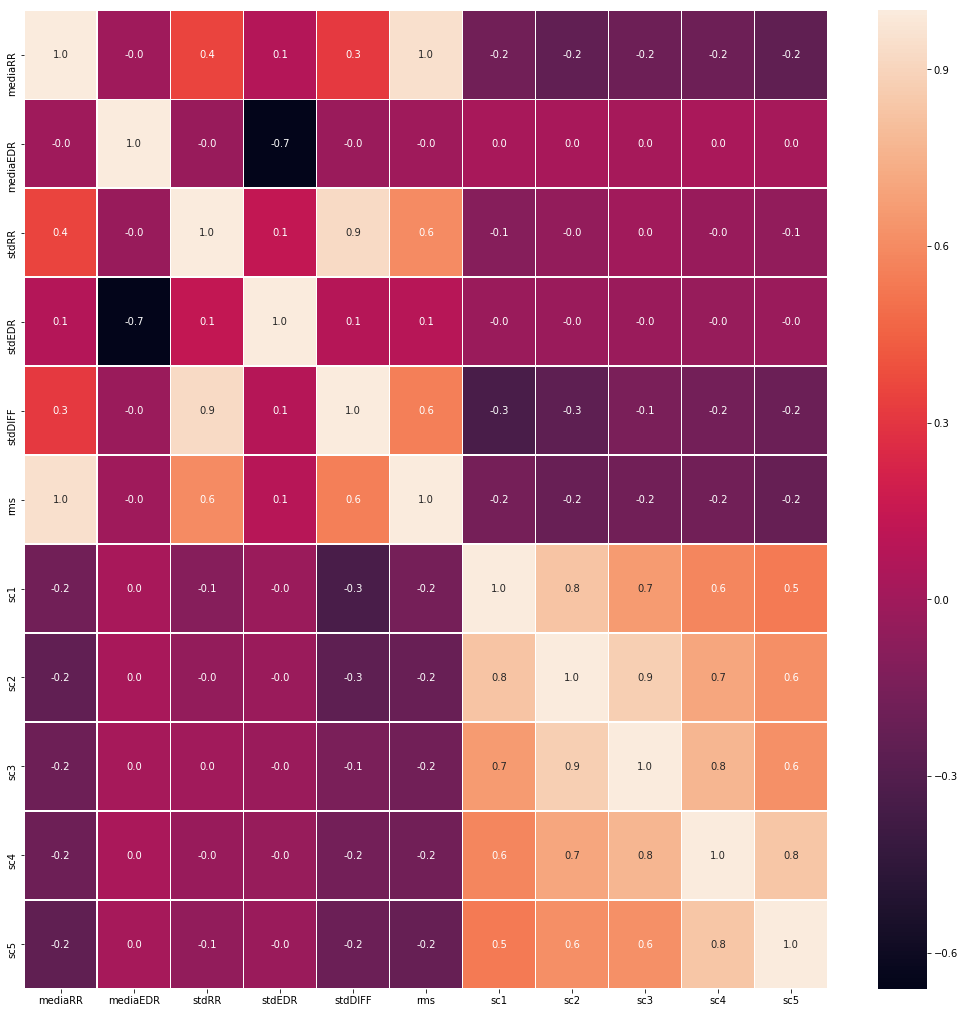

In [55]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.iloc[:,0:11].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Rnadom forest con tutte le features

In [452]:
X.columns

Index(['mediaRR', 'mediaEDR', 'stdRR', 'stdEDR', 'stdDIFF', 'rms', 'sc1',
       'sc2', 'sc3', 'sc4', 'sc5', 'iqr', 'RMSDD', 'NEP', 'label'],
      dtype='object')

Accuracy is:  0.8559638435842012
Sensitivity :  0.8617960426179604
Specificity :  0.8453436807095344


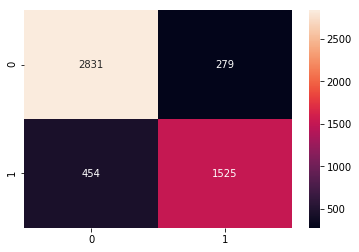

In [830]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
keep=['mediaRR', 'mediaEDR', 'stdRR', 'stdEDR', 'stdDIFF', 'rms', 'sc1',
       'sc2', 'sc3', 'sc4', 'sc5', 'iqr', 'RMSDD', 'NEP']
X=X[keep]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=60)      
clr_rf = clf_rf.fit(x_train,y_train)
#KNN
#clf_rf = KNeighborsClassifier(n_neighbors=10)  
#clf_rf.fit(x_train,y_train)
#SVM
#clf_rf = SVC(kernel='linear')  
#clf_rf.fit(x_train, y_train)  

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")
sensitivity1 = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity1)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clr_rf, X.iloc[:,0:14], y, cv=5)


In [831]:
## k fold cross validation

kfold = KFold(10, True, 1)
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]    
    clr_rf = clf_rf.fit(X_train,y_train)
    ac = accuracy_score(y_test,clf_rf.predict(X_test))
   # clf_rf = clf_rf_2.fit(X_train,y_train)
   # ac = accuracy_score(y_test,clf_rf_2.predict(X_test))
    print(ac)

0.8556275780789628
0.8562168532704774
0.8662345315262228
0.8755896226415094
0.8490566037735849
0.8667452830188679
0.8673349056603774
0.8579009433962265
0.8691037735849056
0.8637971698113207


In [832]:
scores = cross_val_score(clf_rf, X, y, cv=kfold, n_jobs=1)
scores.mean()

0.8627607264762455

### Training su 20 e test su 15 ECG singolarmente con tutte le features

In [804]:
training_indexes=[5,1,2,12,31,13,4,18,11,6,10,9,17,16,19,21,27,28,20,32]
test_indexes=[]
for i in range(0,35):
    if(i not in training_indexes):
        test_indexes.append(i)

In [805]:
test_indexes

[0, 3, 7, 8, 14, 15, 22, 23, 24, 25, 26, 29, 30, 33, 34]

In [806]:
acc=[]
error=[]
for i in test_indexes:
    print(i)
    prova=df_tot.loc[df_tot['db'].isin(training_indexes)]
    prova2=df_tot.loc[df_tot['db'] == i]
    x_train=prova[keep]
    x_test=prova2[keep]
    y_train=prova['label']
    y_test=prova2['label']
    clr_rf = clf_rf.fit(x_train,y_train)
    ac = accuracy_score(y_test,clf_rf.predict(x_test))
    pred=clf_rf.predict(x_test)
    mse=np.array(abs(pred-y_test))
    sum=0
    for k in range (0,len(mse)):
        sum=sum+mse[k]
    error.append(sum/len(mse))
    acc.append(ac)

0
3
7
8
14
15
22
23
24
25
26
29
30
33
34


In [807]:
error
print('media errore: ',statistics.mean(error))

media errore:  0.17477619391068785


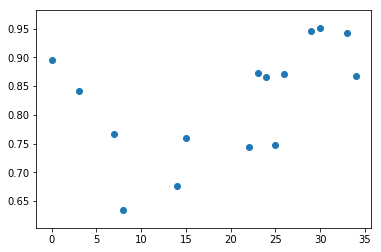

In [808]:
plt.scatter(test_indexes,acc)

In [809]:
acc

[0.8957055214723927,
 0.8414634146341463,
 0.766,
 0.6343434343434343,
 0.6758349705304518,
 0.7588357588357588,
 0.7431818181818182,
 0.8723404255319149,
 0.8657407407407407,
 0.7468354430379747,
 0.8701825557809331,
 0.946236559139785,
 0.9507494646680942,
 0.9429824561403509,
 0.8679245283018868]

In [803]:
statistics.mean(acc)

0.8092799110278794

# Tengo le features che non sono correlate tra loro

In [834]:
drop_list1 = ['mediaRR', 'mediaEDR', 'stdRR', 'stdEDR', 'stdDIFF', 'sc3', 'iqr', 'RMSDD', 'NEP']
x_1 = X[drop_list1] 
x_train, x_test, y_train, y_test = train_test_split(x_1.iloc[:,0:9], y, test_size=0.2, random_state=42)

In [835]:
x_1.columns

Index(['mediaRR', 'mediaEDR', 'stdRR', 'stdEDR', 'stdDIFF', 'sc3', 'iqr',
       'RMSDD', 'NEP'],
      dtype='object')

In [535]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# find best scored 5 features
select_feature = SelectKBest(f_classif, k=9).fit(x_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)
for i in range(0,len(select_feature.scores_)):
     print ('F-score: ',select_feature.scores_[i], ' for feature ',x_train.columns[i])

Score list: [   5.82849764   11.07972962    6.23479953    9.82835229   74.76412276
 3970.14346964   51.16499527   76.53809067   11.54606527]
Feature list: Index(['mediaRR', 'mediaEDR', 'stdRR', 'stdEDR', 'stdDIFF', 'sc3', 'iqr',
       'RMSDD', 'NEP'],
      dtype='object')
F-score:  5.828497638018366  for feature  mediaRR
F-score:  11.079729617503709  for feature  mediaEDR
F-score:  6.234799533932259  for feature  stdRR
F-score:  9.828352288531802  for feature  stdEDR
F-score:  74.76412276193183  for feature  stdDIFF
F-score:  3970.1434696403526  for feature  sc3
F-score:  51.1649952696027  for feature  iqr
F-score:  76.5380906741824  for feature  RMSDD
F-score:  11.546065269374598  for feature  NEP


Accuracy is:  0.8759210138520483
Sensitivity :  0.8779707495429616
Specificity :  0.8721991701244813


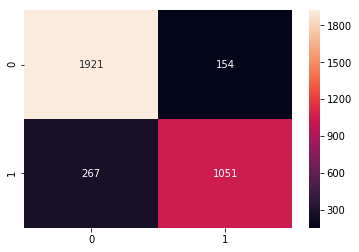

In [842]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier(random_state=60)      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
#KNN
#clf_rf_2 = KNeighborsClassifier(n_neighbors=10)  
#clr_rf_2=clf_rf_2.fit(x_train_2,y_train)
#SVM
#clr_rf_2 = SVC(kernel='linear')  
#clr_rf_2.fit(x_train, y_train)  

ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))

print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")
sensitivity1 = cm_2[0,0]/(cm_2[0,0]+cm_2[1,0])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm_2[1,1]/(cm_2[1,1]+cm_2[0,1])
print('Specificity : ', specificity1)


Normalized confusion matrix
[[0.92578313 0.07421687]
 [0.20257967 0.79742033]]


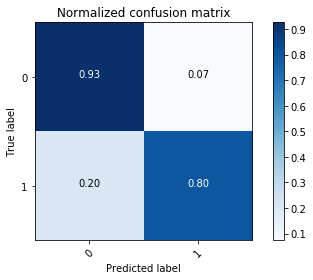

In [843]:
plt.figure()
plot_confusion_matrix(cm_2, classes=['0','1'], normalize=True,
                      title='Normalized confusion matrix')

In [844]:
x_1.columns

Index(['mediaRR', 'mediaEDR', 'stdRR', 'stdEDR', 'stdDIFF', 'sc3', 'iqr',
       'RMSDD', 'NEP'],
      dtype='object')

In [845]:
## k fold cross validation
a=[]
kfold = KFold(10, True, 1)
for train, test in kfold.split(x_1):
    train_k_fold.append(train)
    test_k_fold.append(test)
    #print('train: %s, test: %s' % (train, test))
for train_index, test_index in kfold.split(x_1):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x_1.iloc[train_index], x_1.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
   # clf_rf_2 = RandomForestClassifier(random_state=60)      
    clr_rf_2 = clf_rf_2.fit(X_train,y_train)
    ac_2 = accuracy_score(y_test,clf_rf_2.predict(X_test))
    print(ac_2)
    a.append(ac_2)
print('media',statistics.mean(a))

0.863877430760165
0.858573954036535
0.8809664113140837
0.8726415094339622
0.8738207547169812
0.8755896226415094
0.8761792452830188
0.8679245283018868
0.870872641509434
0.8649764150943396
media 0.8705422513091916


In [846]:
scores = cross_val_score(clr_rf_2, x_1, y, cv=kfold, n_jobs=1)

In [847]:
scores.mean()

0.8705422513091916

### Training su 20 e test su 15 ECG singolarmente

In [870]:
training_indexes=[0,1,2,12,4,13,6,18,8,9,10,11,17,16,19,21,27,28,20,32]
test_indexes=[]
for i in range(0,35):
    if(i not in training_indexes):
        test_indexes.append(i)

In [871]:
x_1.columns

Index(['mediaRR', 'mediaEDR', 'stdRR', 'stdEDR', 'stdDIFF', 'sc3', 'iqr',
       'RMSDD', 'NEP', 'db', 'label'],
      dtype='object')

In [887]:
x_1['db']=df_tot['db']
x_1['label']=df_tot['label']
acc=[]
error=[]
for i in test_indexes:
    print(i)
    prova=df_tot.loc[x_1['db'].isin(training_indexes)]
    prova2=df_tot.loc[x_1['db'] == i]
    x_train=prova[keep]
    x_test=prova2[keep]
    y_train=prova['label']
    y_test=prova2['label']
    clf_rf_2 = RandomForestClassifier(random_state=60)      
    clr_rf2 = clr_rf_2.fit(x_train,y_train)
    pred=clr_rf_2.predict(x_test)
    ac = accuracy_score(y_test,pred)
    
    mse=np.array(abs(pred-y_test))
    sum=0
    for k in range (0,len(mse)):
        sum=sum+mse[k]
    error.append(sum/len(mse))
    acc.append(ac)

C:\Users\sara\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sara\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


3
5
7
14
15
22
23
24
25
26
29
30
31
33
34


In [888]:
error
print('media errore: ',statistics.mean(error))

media errore:  0.17592568720781895


In [889]:
error

[0.0975609756097561,
 0.34577603143418467,
 0.21,
 0.27897838899803534,
 0.26403326403326405,
 0.25681818181818183,
 0.14657210401891252,
 0.15046296296296297,
 0.12447257383966245,
 0.12373225152129817,
 0.09462365591397849,
 0.08993576017130621,
 0.20327102803738317,
 0.08991228070175439,
 0.16273584905660377]

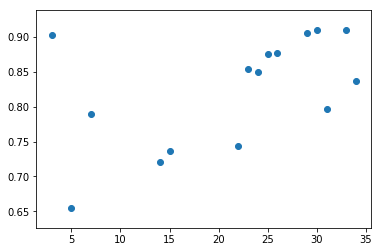

In [890]:
plt.scatter(test_indexes,acc)

In [892]:
statistics.mean(acc)

0.824074312792181

## Frequency domain Features

In [ ]:

#CALCOLO LE FEATURES
df_features_list=[]
db_index=[0,1,2,3,4,5,6,7,8,9]
durata=[]
for index in db_index:
#index=0
    print(index)
    dfQRS = pd.read_pickle( mypath+'RR-EDR/'+fileName[index]+'RR.pkl')
    dfQRS=dfQRS.dropna()
    RR_intervals=dfQRS['rr']
    df = pd.read_pickle( mypath+'DivisioneDB/'+fileName[index]+'divisione.pkl')
    df_features=pd.DataFrame()
    db=[]
    ffts=[]
    PSD=np.zeros((len(df),32))
    PSD_tot=[]
    for i in range(0,len(df)):
       # print(i)
        durata.append(df['stopRRIndex'][i]-df['startRRIndex'][i])
        if(durata[i]<2):
            ffts.append(np.nan)

        else:
            intervalloRR=np.array(RR_intervals[df['startRRIndex'][i]:df['stopRRIndex'][i]])

            PSD64=calcolaPSD(intervalloRR)
            PSD32=PSD64[0:31]
            ffts.append(PSD32)
            for k in range (0,31):
                PSD[i][k]=PSD32[k]
        db.append(index)

    df_features['db']=db
    label=[]
    for i in range(0,len(df['label'])):
        if(df['label'][i]=='A'):
            label.append(1)
        else:
            label.append(0)

    df_features['label']=label
    df_PSD=pd.DataFrame(PSD)
    df_features = pd.concat([df_features, df_PSD], axis=1, sort=False)
    df_features=df_features.dropna() 
    df_features_list.append(df_features)

In [927]:
df_freq=pd.DataFrame()
for i in range(0,len(df_features_list)):
    df_freq=df_freq.append(df_features_list[i],ignore_index=True)

In [401]:
df_freq.to_pickle(mypath+'Features/FrequencyFeatures.pkl')

In [922]:
scaler = MinMaxScaler() 
df_freq=df_freq.dropna()
scaled_values = scaler.fit_transform(df_freq) 
df_freq.loc[:,:] = scaled_values
df_tot=df_freq

In [408]:
df_tot
df_freq.to_pickle(mypath+'Features/FrequencyFeaturesNormalized.pkl')


### Select features

In [934]:
df_tot = pd.read_pickle(mypath+'Features/FrequencyFeatures.pkl')

In [928]:
x_columns = [   0,       1,       2,       3,       4,       5,
             6,       7,       8,       9,      10,      11,      12,      13,
            14,      15,      16,      17,      18,      19,      20,      21,
            22,      23,      24,      25,      26,      27,      28,      29,
            30,      ]

In [931]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression
X = df_tot[x_columns]
X = (X - X.mean()) / (X.std())  
y = np.array(df_tot['label'])
#X['label']=y
Selector_f = SelectPercentile(f_regression, percentile=25)
Selector_f.fit(X, y)
features=X.columns
for i in range(0,len(Selector_f.scores_)):
     print ('F-score: ',Selector_f.scores_[i], ' for feature ',features[i])

F-score:  9.398282457847658  for feature  0
F-score:  1.362775026577302  for feature  1
F-score:  0.7775089688460008  for feature  2
F-score:  4.557924338845685  for feature  3
F-score:  4.9941017902762495  for feature  4
F-score:  3.753671763027132  for feature  5
F-score:  2.9311314954726675  for feature  6
F-score:  2.080862668918278  for feature  7
F-score:  4.61542372211872  for feature  8
F-score:  1.6492407632501713  for feature  9
F-score:  2.209047595590463  for feature  10
F-score:  0.02005532267237709  for feature  11
F-score:  0.0013507838397197101  for feature  12
F-score:  0.18683115014630014  for feature  13
F-score:  0.4889242785090699  for feature  14
F-score:  0.23108886382407734  for feature  15
F-score:  1.4974629749828932  for feature  16
F-score:  2.219587048881999  for feature  17
F-score:  2.978135447356832  for feature  18
F-score:  3.8069731682227905  for feature  19
F-score:  6.155427171168264  for feature  20
F-score:  5.9331236970533645  for feature  21
F-s

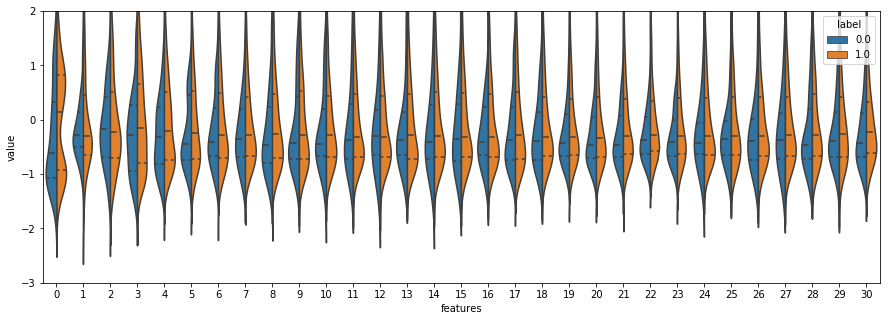

In [930]:
plt.figure(figsize=(15,5))
X['label']=y
data = pd.melt(X,id_vars="label",
                    var_name="features",
                    value_name='value')
plt.axis([9,10000,-3,2])
sns.violinplot(x="features", y="value", hue="label", data=data,split=True, inner="quart")

Accuracy is:  0.9285714285714286
Sensitivity :  nan
Specificity :  0.9285714285714286


C:\Users\sara\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in longlong_scalars
  from ipykernel import kernelapp as app


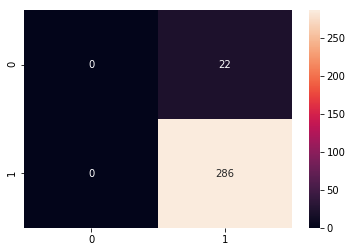

In [932]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=60)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")
sensitivity1 = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity1)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clr_rf, X.iloc[:,0:14], y, cv=5)


In [920]:
X

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,label
0,-0.642467,-0.104911,-0.138846,-0.184358,-0.194280,-0.126014,-0.110594,-0.116808,-0.118735,-0.088767,...,-0.043830,-0.034258,-0.033892,-0.038773,-0.037979,-0.029562,-0.031072,-0.040523,-0.037951,0
1,-0.638810,-0.137827,-0.134299,-0.196145,-0.183610,-0.139480,-0.109818,-0.123474,-0.120797,-0.087829,...,-0.044280,-0.035381,-0.037123,-0.033447,-0.035731,-0.030867,-0.036815,-0.038013,-0.037660,0
2,-0.733873,-0.105351,-0.109805,-0.177363,-0.195153,-0.133570,-0.125157,-0.142651,-0.115863,-0.072348,...,-0.038993,-0.043096,-0.041709,-0.029230,-0.030643,-0.037662,-0.040788,-0.033161,-0.036452,0
3,-0.754461,-0.114706,-0.155212,-0.260673,-0.138105,-0.119871,-0.175055,-0.110702,-0.071560,-0.093293,...,-0.040309,-0.047096,-0.034454,-0.031378,-0.036987,-0.039466,-0.029914,-0.034956,-0.040011,0
4,-0.783401,-0.126307,-0.186272,-0.279179,-0.152973,-0.120856,-0.151893,-0.168306,-0.112652,-0.086458,...,-0.051049,-0.042882,-0.032064,-0.037097,-0.040484,-0.035311,-0.032657,-0.039359,-0.042340,0
5,-0.692001,-0.004541,-0.063969,-0.136702,-0.166208,-0.120172,-0.049191,-0.058884,-0.074987,-0.059538,...,-0.048125,-0.042907,-0.037324,-0.033043,-0.035789,-0.034351,-0.028996,-0.024238,-0.028815,0
6,-0.698216,-0.008642,-0.040237,-0.095024,-0.064630,-0.156548,-0.142063,-0.050474,-0.051469,-0.078313,...,-0.038080,-0.029191,-0.021008,-0.030459,-0.030714,-0.034846,-0.027253,-0.028384,-0.030441,0
7,-0.564373,-0.054875,-0.047177,-0.121729,-0.177428,-0.126007,-0.095214,-0.081174,-0.096458,-0.093372,...,-0.042082,-0.037787,-0.025595,-0.023827,-0.034470,-0.031134,-0.033845,-0.027116,-0.032976,0
8,-0.830551,-0.116597,-0.137915,-0.072570,-0.043793,-0.140040,-0.082187,-0.019300,-0.118960,-0.074428,...,-0.028019,-0.043407,-0.025344,-0.022412,-0.027950,-0.030031,-0.031472,-0.038089,-0.022759,0
9,-0.424561,-0.084696,-0.053515,-0.086601,-0.128060,-0.140902,-0.114993,-0.071352,-0.049720,-0.050299,...,-0.041996,-0.038763,-0.036334,-0.028422,-0.028062,-0.026092,-0.031023,-0.035250,-0.036072,0
